In [3]:
import tensorflow as tf

# 28x28 pixel images
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Feature is the pixel data of a handwritten number while the label would be the number to predict based on pixel data.

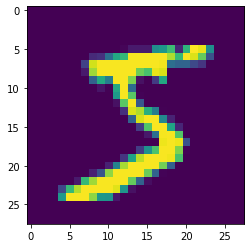

In [10]:
import matplotlib.pyplot as plt

# Handwritten Image
plt.imshow(x_train[0])

In [16]:
# Pixel Data
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
# Label
y_train[0]

5

In [18]:
model = tf.keras.models.Sequential()

## Add Layers
# Flatten 28x28 array
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Final Layer, only 10 outcomes, 0-9
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5669 - accuracy: 0.8673
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3751 - accuracy: 0.9163
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2827 - accuracy: 0.9316


In [32]:
val_loss, val_acc = model.evaluate(x_test, y_test)
'Valid Loss:' + str(val_loss) + '|Valid Acc:' + str(val_acc)

313/313 [==============================] - 0s 681us/step - loss: 0.2539 - accuracy: 0.9450


'Valid Loss:0.2538548707962036|Valid Acc:0.9449999928474426'

Wow! 94.5% Validaion Accuracy, that is impressive!
Let's see how well the model does after scaling the data.

In [33]:
# Normalize/Scale Pixel Data

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [34]:
model = tf.keras.models.Sequential()

## Add Layers
# Flatten 28x28 array
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Final Layer, only 10 outcomes, 0-9
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 948us/step - loss: 0.2600 - accuracy: 0.9237
Epoch 2/3
1875/1875 [==============================] - 2s 968us/step - loss: 0.1076 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 2s 942us/step - loss: 0.0746 - accuracy: 0.9770


In [35]:
val_loss, val_acc = model.evaluate(x_test, y_test)
'Valid Loss:' + str(val_loss) + '|Valid Acc:' + str(val_acc)

313/313 [==============================] - 0s 672us/step - loss: 0.1037 - accuracy: 0.9677


'Valid Loss:0.10370412468910217|Valid Acc:0.9677000045776367'

We were able to improve the model with scaling the pixels!
How would we make a prediction?

In [40]:
predictions = model.predict(x_test)

# One-Hot Array of Predictions
print(predictions)

[[4.1245092e-09 1.0820944e-08 1.1058774e-05 ... 9.9996507e-01
  6.2506956e-07 5.1979391e-06]
 [1.7608134e-08 1.9249439e-04 9.9880981e-01 ... 1.0225059e-07
  1.9367924e-07 2.2510719e-11]
 [2.6689278e-07 9.9817491e-01 4.1104799e-05 ... 1.3192455e-04
  1.0381108e-03 1.2786876e-05]
 ...
 [6.6172517e-10 4.7348436e-07 6.8728037e-09 ... 9.3433182e-06
  5.0637601e-07 9.3944218e-05]
 [9.4602092e-06 1.0404395e-05 8.9773121e-06 ... 5.5633831e-07
  8.9094350e-03 7.1074146e-07]
 [3.1712435e-08 3.2760672e-09 4.7113616e-08 ... 1.0892171e-12
  1.6604264e-09 1.0470061e-09]]


In [43]:
# Convert One-Hot Array to the prediction label

import numpy as np

print(np.argmax(predictions[3]))

0


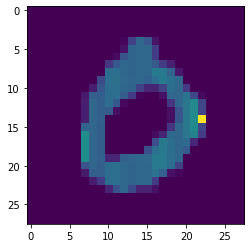

In [44]:
# Let's see what the image looks like

plt.imshow(x_test[3])